In [3]:
import pandas as pd

df = pd.read_excel('Customer Survey.xlsx')

In [4]:
df.head(5)

Unnamed: 0 ประทับเวลา  ...  Software ถูกลิขสิทธิ์ ครีมกันแดด
0 2021-03-20   11:53:45  ...                    เคย        เคย
1 2021-03-20   11:54:01  ...                 ไม่เคย        เคย
2 2021-03-20   11:54:05  ...                    เคย        เคย
3 2021-03-20   11:54:13  ...                 ไม่เคย        เคย
4 2021-03-20   11:54:18  ...                    เคย        เคย

[5 rows x 64 columns]

In [5]:
missing = df.isnull().sum()
print(missing)

Unnamed: 0                       0
ประทับเวลา                       0
Transaction                      0
จักรยานเสือภูเขา                 0
คอลลาเจน                         0
                                ..
หมอนสุขภาพสำหรับคนนอนไม่หลับ     0
อาหารแมวคลีนเพื่อสุขภาพลดหุ่น    0
น้ำส้มดีโด้                      0
Software ถูกลิขสิทธิ์            0
ครีมกันแดด                       0
Length: 64, dtype: int64


In [6]:
df.replace('ไม่เคย',0,inplace = True)
df.replace('เคย',1,inplace = True)
del df['Unnamed: 0']
del df['ประทับเวลา']
del df['Transaction']

In [7]:
df.head(10)

จักรยานเสือภูเขา  คอลลาเจน  ...  Software ถูกลิขสิทธิ์  ครีมกันแดด
0                 0         0  ...                      1           1
1                 0         1  ...                      0           1
2                 1         0  ...                      1           1
3                 0         0  ...                      0           1
4                 0         1  ...                      1           1
5                 1         1  ...                      0           1
6                 0         0  ...                      1           1
7                 0         0  ...                      0           1
8                 0         0  ...                      1           1
9                 0         1  ...                      1           1

[10 rows x 61 columns]

In [8]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

--2021-05-30 13:41:08--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2021-05-30 13:41:08--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.001s  

2021-05-30 13:41:08 (82.7 MB/s) - ‘t

In [9]:
import matplotlib
import matplotlib.font_manager as fm

from os import path
if not path.exists('Sarabun-Regular.ttf'):
    !wget https://github.com/google/fonts/blob/master/ofl/sarabun/Sarabun-Regular.ttf?raw=true -O Sarabun-Regular.ttf

--2021-05-30 13:41:46--  https://github.com/google/fonts/blob/master/ofl/sarabun/Sarabun-Regular.ttf?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/google/fonts/blob/main/ofl/sarabun/Sarabun-Regular.ttf [following]
--2021-05-30 13:41:46--  https://github.com/google/fonts/blob/main/ofl/sarabun/Sarabun-Regular.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Sarabun-Regular.ttf’

Sarabun-Regular.ttf     [ <=>                ] 106.26K  --.-KB/s    in 0.006s  

2021-05-30 13:41:46 (17.6 MB/s) - ‘Sarabun-Regular.ttf’ saved [108812]



In [10]:
df.head(5)

จักรยานเสือภูเขา  คอลลาเจน  ...  Software ถูกลิขสิทธิ์  ครีมกันแดด
0                 0         0  ...                      1           1
1                 0         1  ...                      0           1
2                 1         0  ...                      1           1
3                 0         0  ...                      0           1
4                 0         1  ...                      1           1

[5 rows x 61 columns]

In [11]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
df = df.applymap(encode_units)

In [12]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

In [13]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

antecedents     consequents  ...  leverage  conviction
0  (กะหรี่(ปั๊บ))      (คอลลาเจน)  ...  0.012913    1.029904
1      (คอลลาเจน)  (กะหรี่(ปั๊บ))  ...  0.012913    1.568182
2       (กระเป๋า)      (คอลลาเจน)  ...  0.000000    1.000000
3      (คอลลาเจน)       (กระเป๋า)  ...  0.000000         inf
4          (ชาบู)      (คอลลาเจน)  ...  0.000000    1.000000
5      (คอลลาเจน)          (ชาบู)  ...  0.000000         inf
6          (โรตี)      (คอลลาเจน)  ...  0.023760    1.055024
7      (คอลลาเจน)          (โรตี)  ...  0.023760         inf
8      (คอลลาเจน)    (ครีมกันแดด)  ...  0.000000         inf
9    (ครีมกันแดด)      (คอลลาเจน)  ...  0.000000    1.000000

[10 rows x 9 columns]

In [14]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

antecedents  ... conviction
0             (กะหรี่(ปั๊บ))  ...   1.029904
1                 (คอลลาเจน)  ...   1.568182
2                  (กระเป๋า)  ...   1.000000
3                 (คอลลาเจน)  ...        inf
4                     (ชาบู)  ...   1.000000
...                      ...  ...        ...
322275             (กระเป๋า)  ...   1.000000
322276         (หมูแดดเดียว)  ...   1.223776
322277                (ชาบู)  ...   1.000000
322278  (แฟน ที่แปลว่าพัดลม)  ...   1.168831
322279          (เนื้อวากิล)  ...   1.883117

[322280 rows x 9 columns]

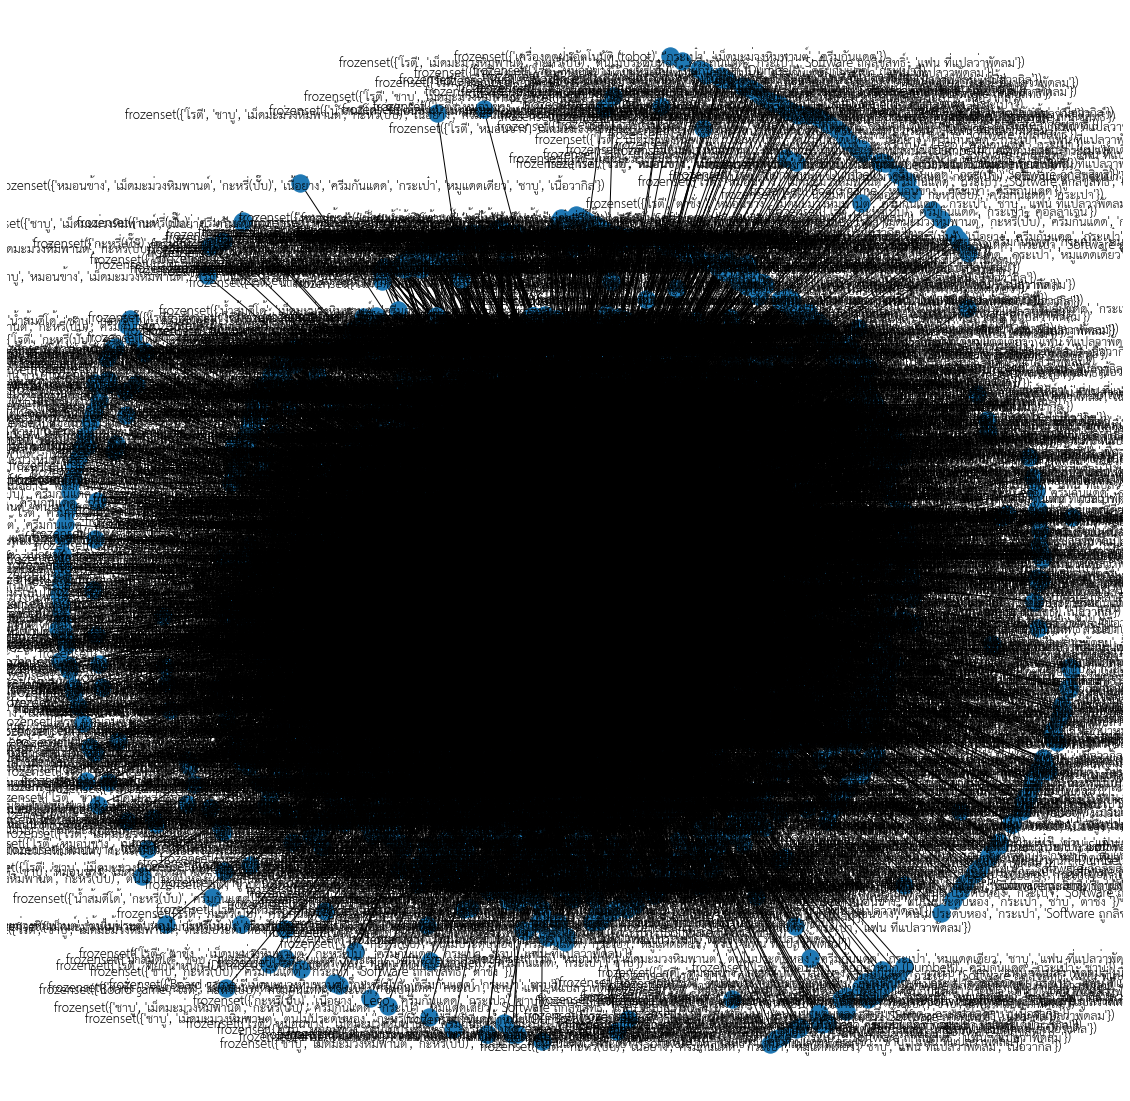

In [46]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(20,20))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True,font_family='TH Sarabun New')


In [47]:
item_item_matrix = pd.DataFrame(index=df.columns,columns=df.columns)

In [48]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(df.iloc[:,i],df.iloc[:,j])

In [49]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [58]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]

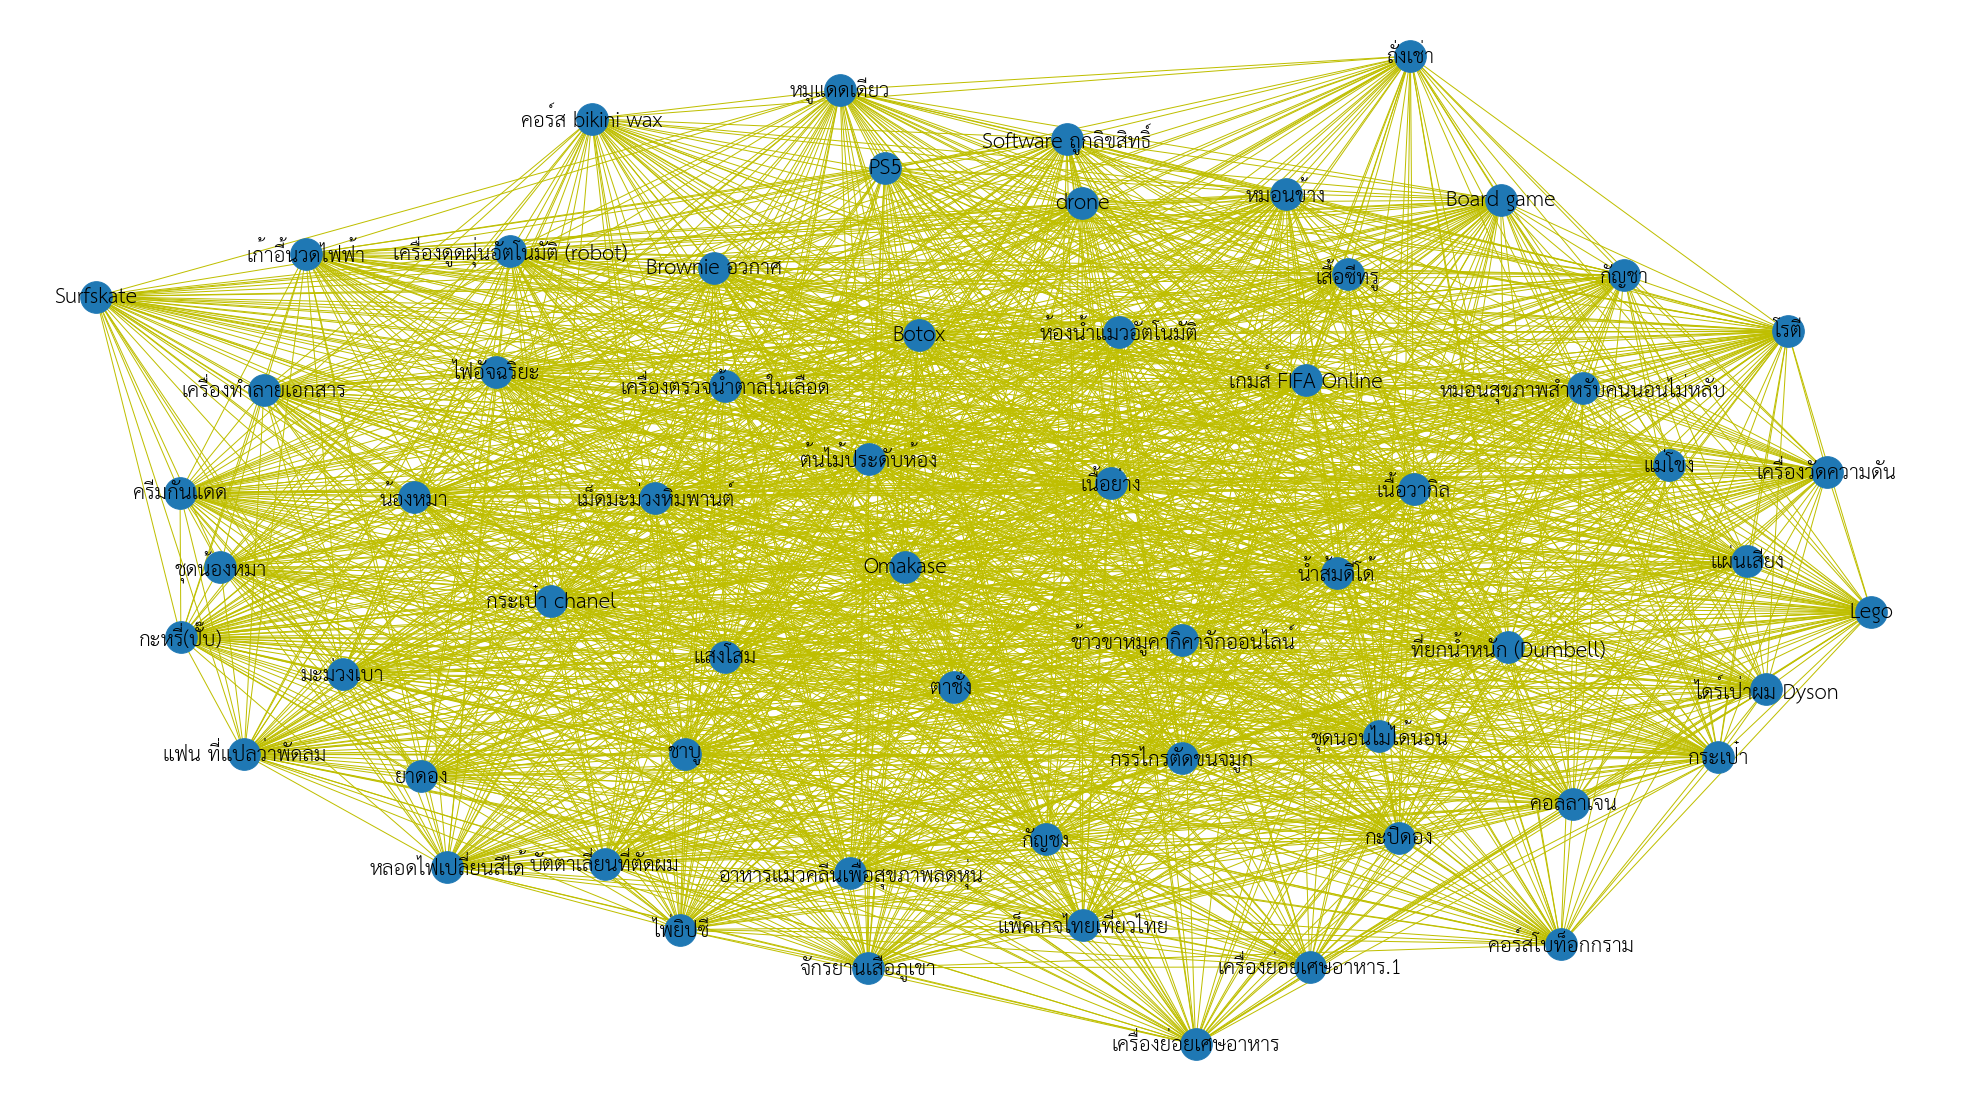

In [62]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(35,20))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')

nx.draw(GA,with_labels=True,font_family='TH Sarabun New', node_size = 1000,edge_color='y',font_size=20)
plt.rcParams['font.family'] = 'TH Sarabun New'